In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
from google.colab import files as f
up=f.upload()

Saving Salary_Data.csv to Salary_Data.csv
Saving Problem_statements.txt to Problem_statements.txt


In [3]:
with open("Problem_statements.txt","r") as f:
    print(f.read())

1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.



# **(2) Prediction model for Salary_hike**


In [ ]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df.shape

(30, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

<Axes: >

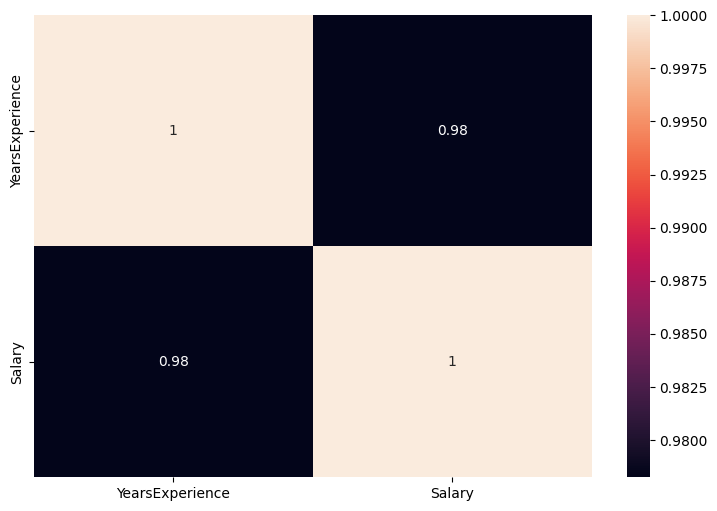

In [ ]:
sns.heatmap(df.corr(),annot=True)

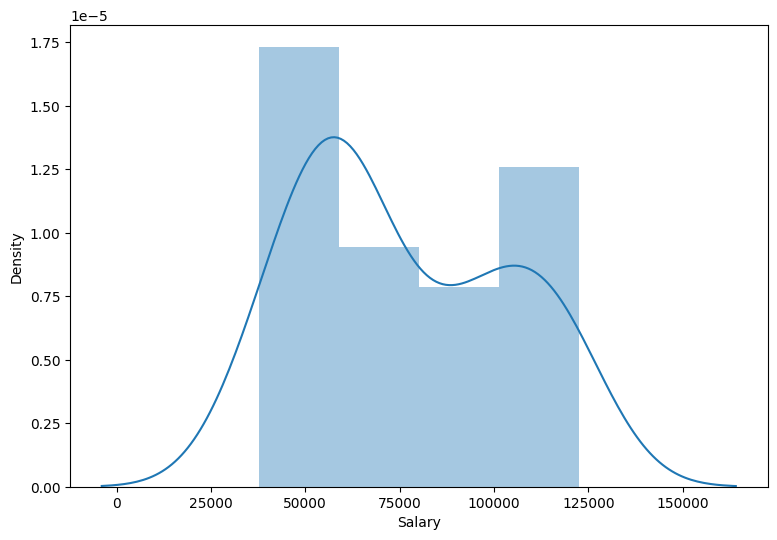

In [ ]:
sns.distplot(df["Salary"]);

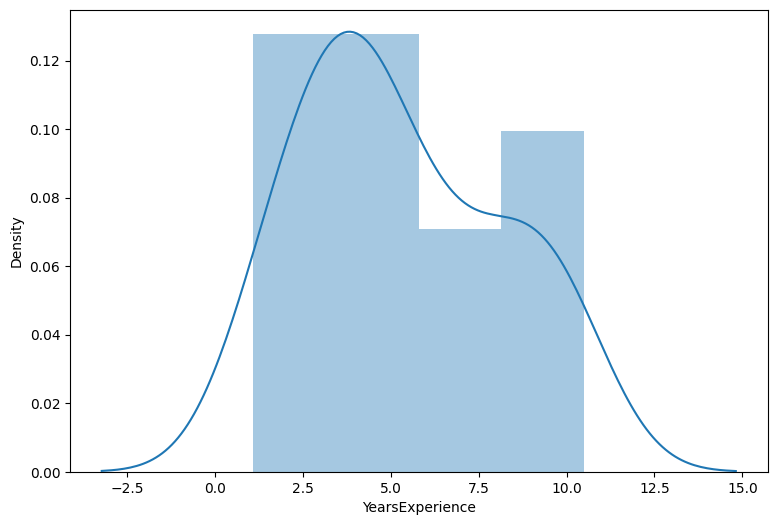

In [ ]:
sns.distplot(df["YearsExperience"]);

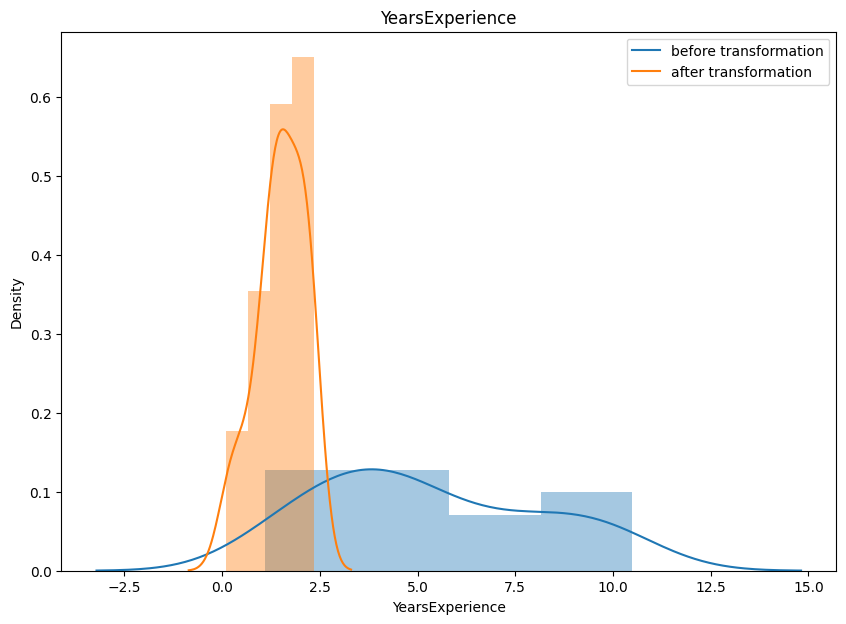

In [ ]:
sns.distplot(df["YearsExperience"])
sns.distplot(np.log(df["YearsExperience"]))
plt.title("YearsExperience")
plt.legend(["before transformation","after transformation"]);

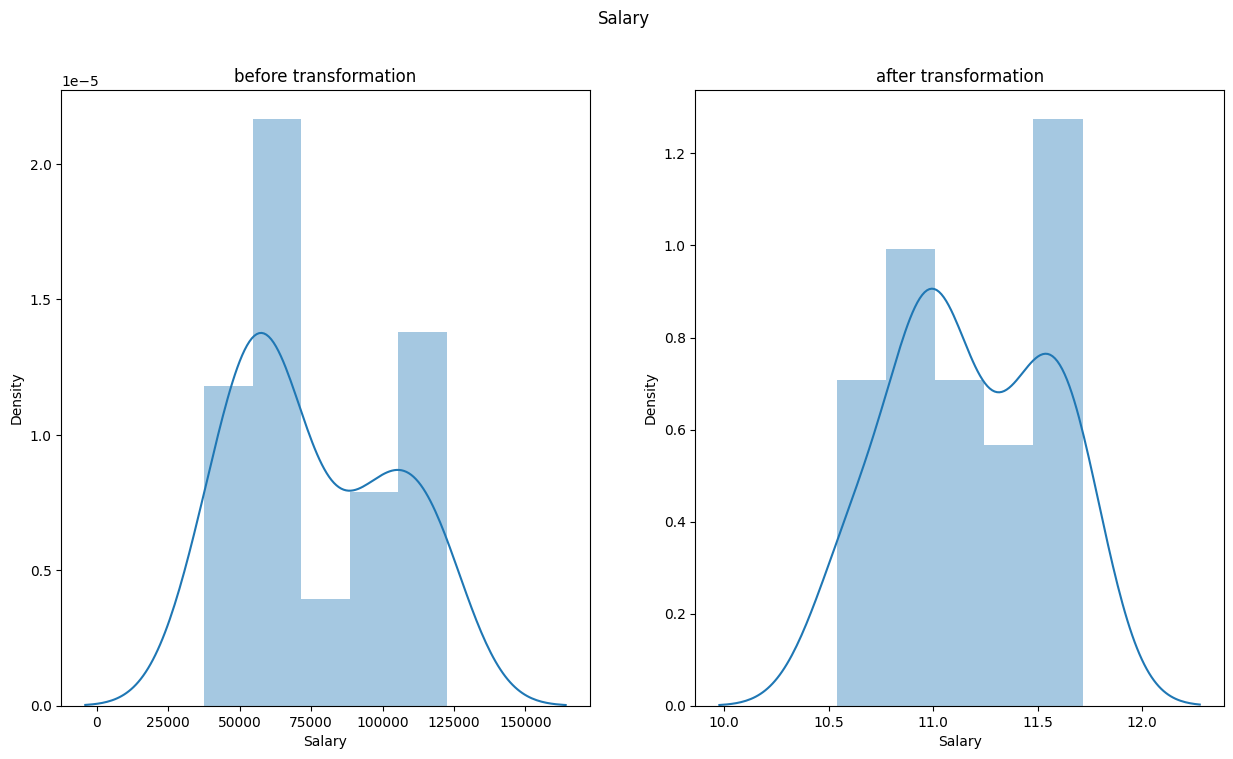

In [ ]:
f,axs=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df["Salary"],ax=axs[0],bins=5)
sns.distplot(np.log(df["Salary"]),ax=axs[1],bins=5)
plt.suptitle("Salary")
axs[0].set_title("before transformation")
axs[1].set_title("after transformation");

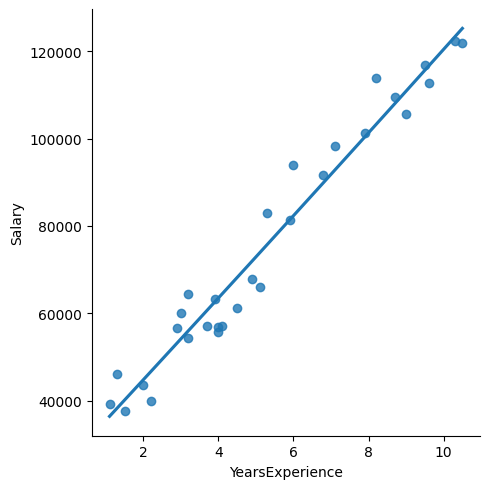

In [ ]:
sns.lmplot(y ="Salary", x ="YearsExperience", data = df, order = 2, ci = None)
plt.show()

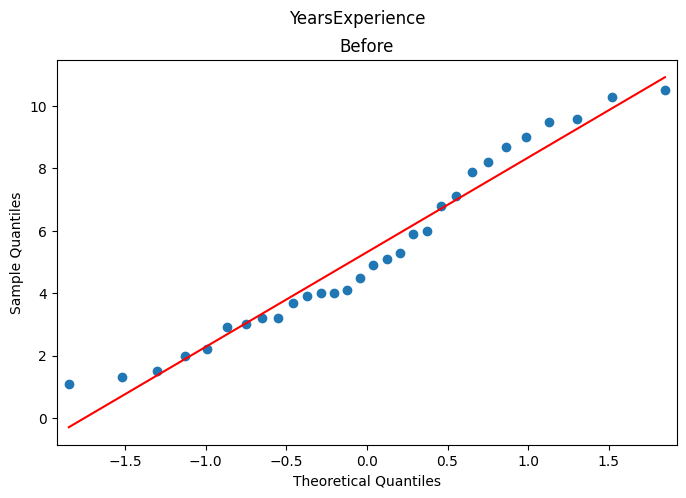

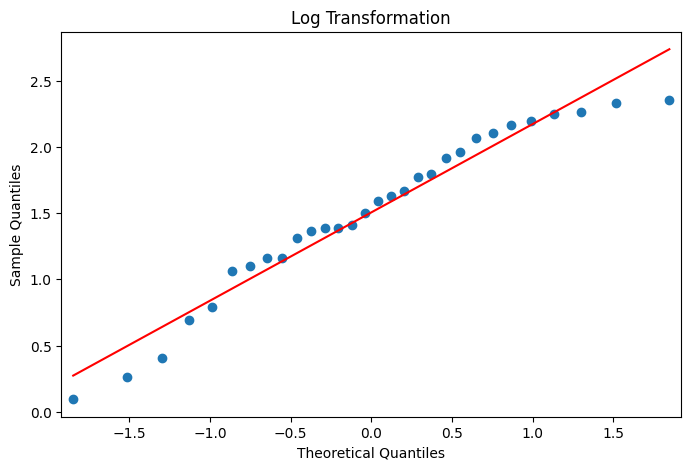

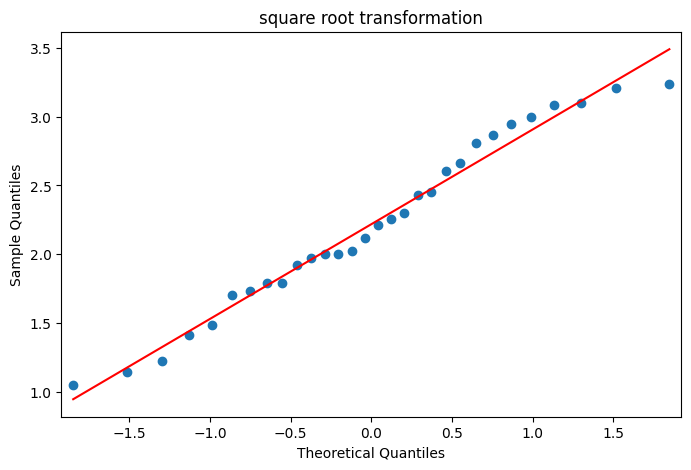

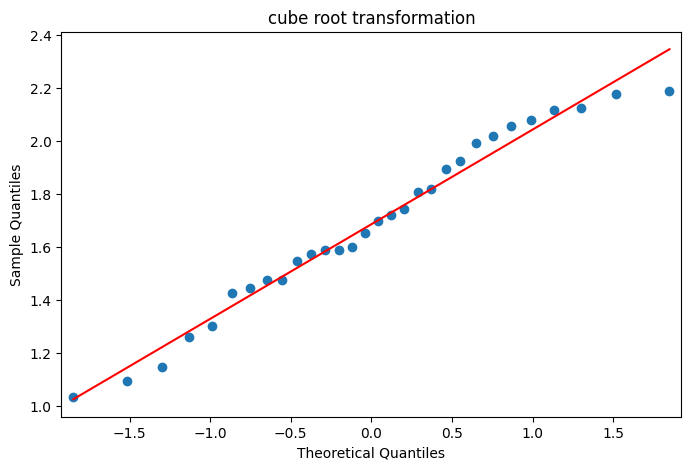

In [ ]:
sm.qqplot(df["YearsExperience"],line="r");
plt.suptitle("YearsExperience")
plt.title("Before")
sm.qqplot(np.log(df["YearsExperience"]),line="r")
plt.title("Log Transformation");
sm.qqplot(np.sqrt(df["YearsExperience"]),line="r");
plt.title("square root transformation")
sm.qqplot(np.cbrt(df["YearsExperience"]),line="r")
plt.title("cube root transformation");


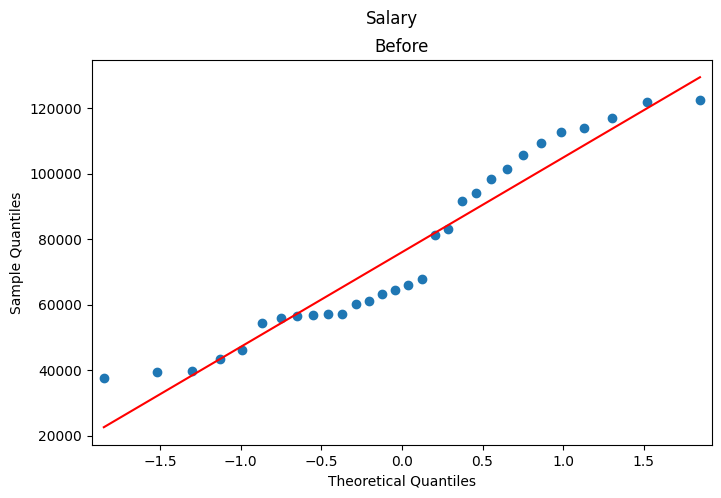

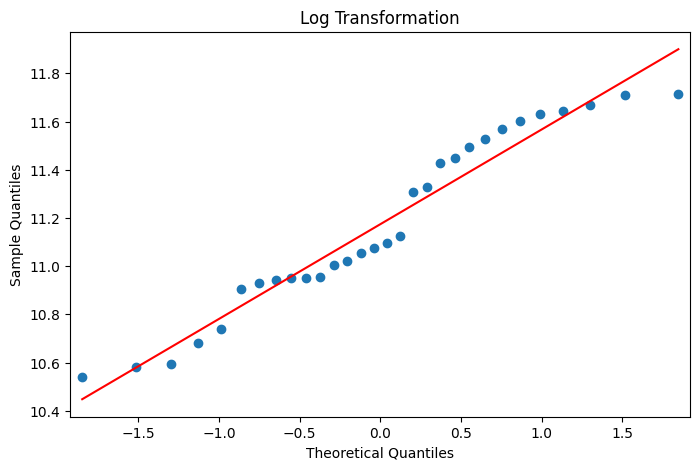

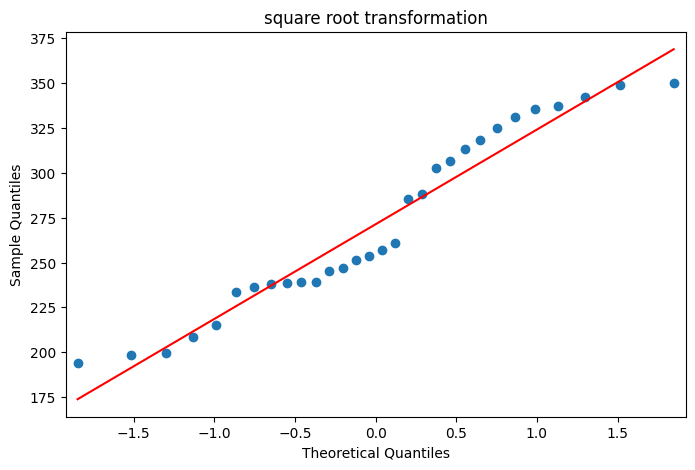

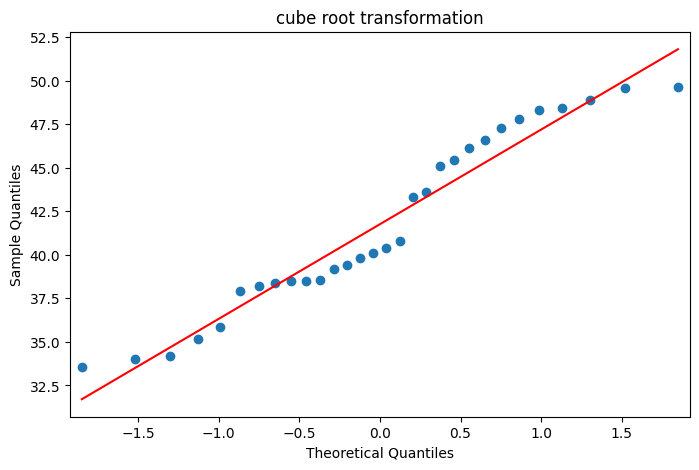

In [ ]:
plt.rcParams["figure.figsize"]=(8,5)
sm.qqplot(df["Salary"],line="r");
plt.suptitle("Salary")
plt.title("Before")
sm.qqplot(np.log(df["Salary"]),line="r")
plt.title("Log Transformation");
sm.qqplot(np.sqrt(df["Salary"]),line="r");
plt.title("square root transformation")
sm.qqplot(np.cbrt(df["Salary"]),line="r")
plt.title("cube root transformation");


In [ ]:
from sklearn.model_selection import train_test_split
def data_tansform(n):
    global x_train,x_test,y_train,y_test
    if n==1:
        X=df.iloc[:,0]
        y=df.iloc[:,1]
    if n==2:
        X=np.log(df.iloc[:,0])
        y=np.log(df.iloc[:,1])
    if n==3:
        X=np.sqrt(df.iloc[:,0])
        y=np.sqrt(df.iloc[:,1])
    if n==4:
        X=np.cbrt(df.iloc[:,0])
        y=np.cbrt(df.iloc[:,1])
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
    x_train=x_train.values.reshape(-1,1)
    y_train=y_train.values.reshape(-1,1)
    x_test=x_test.values.reshape(-1,1)
    y_test=y_test.values.reshape(-1,1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train,y_train)
x_test=scaler.transform(x_test)

Train accuracy : 0.9645401573418146
Test accracy : 0.9024461774180497


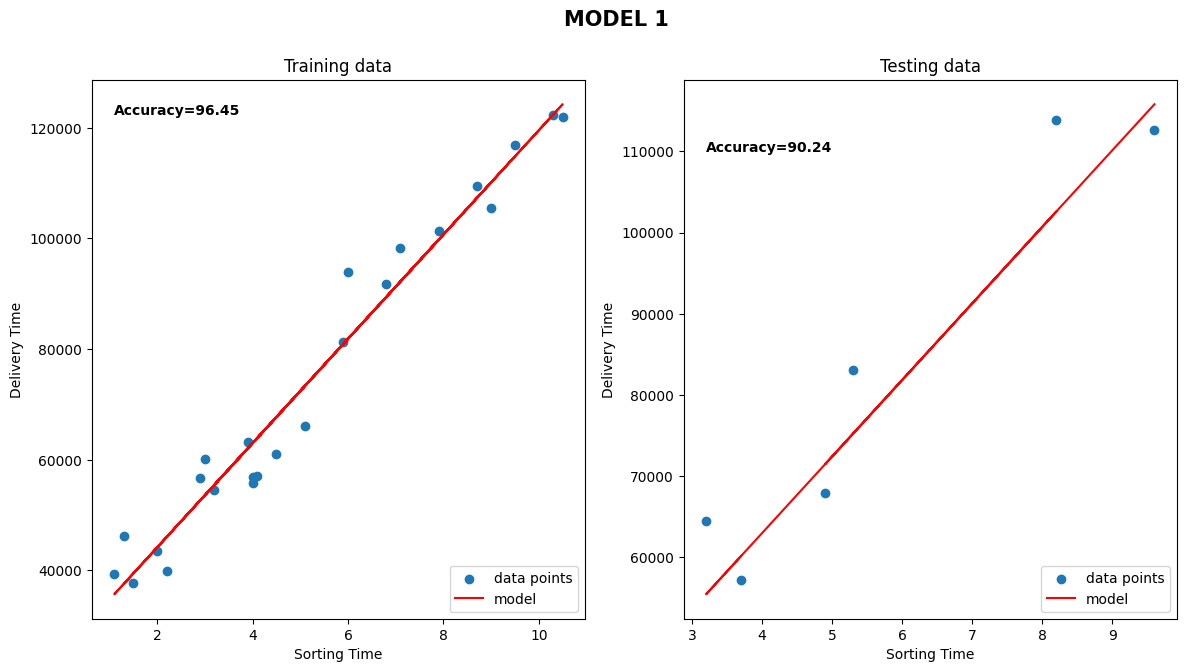

In [ ]:
# no transformation
model_1=data_tansform(1)
build_model()
tr1,ts1,mse1=view_model("MODEL 1",2)

Train accuracy : 0.9059499688613233
Test accracy : 0.871541809683478


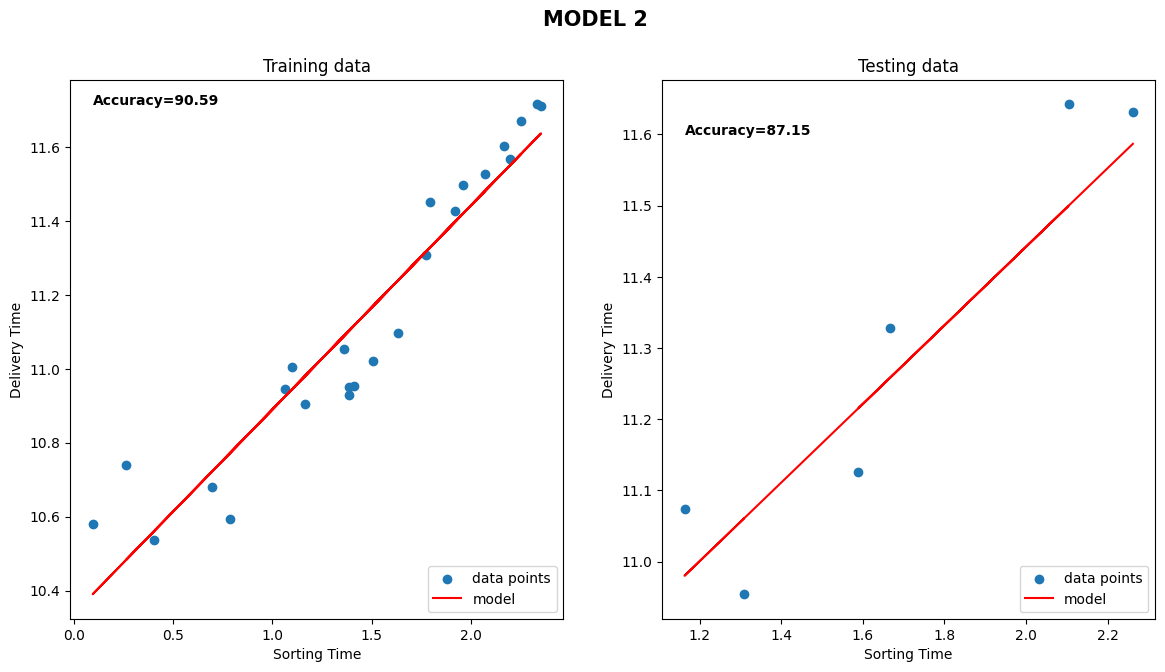

In [ ]:
# no transformation
model_2=data_tansform(2)
build_model()
tr2,ts2,mse2=view_model("MODEL 2",2)

Train accuracy : 0.9461077879230907
Test accracy : 0.9003137054925894


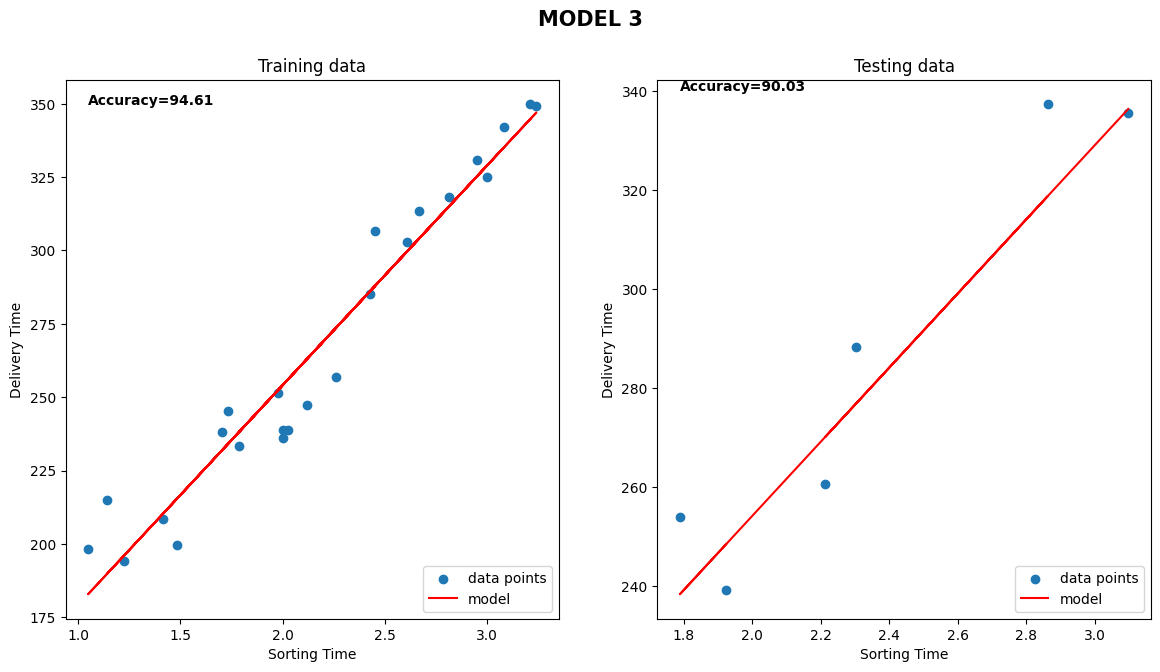

In [ ]:
#sqrt transformation
model_3=data_tansform(3)
build_model()
tr3,ts3,mse3=view_model("MODEL 3",2)

Train accuracy : 0.9353850877930314
Test accracy : 0.8948250735554693


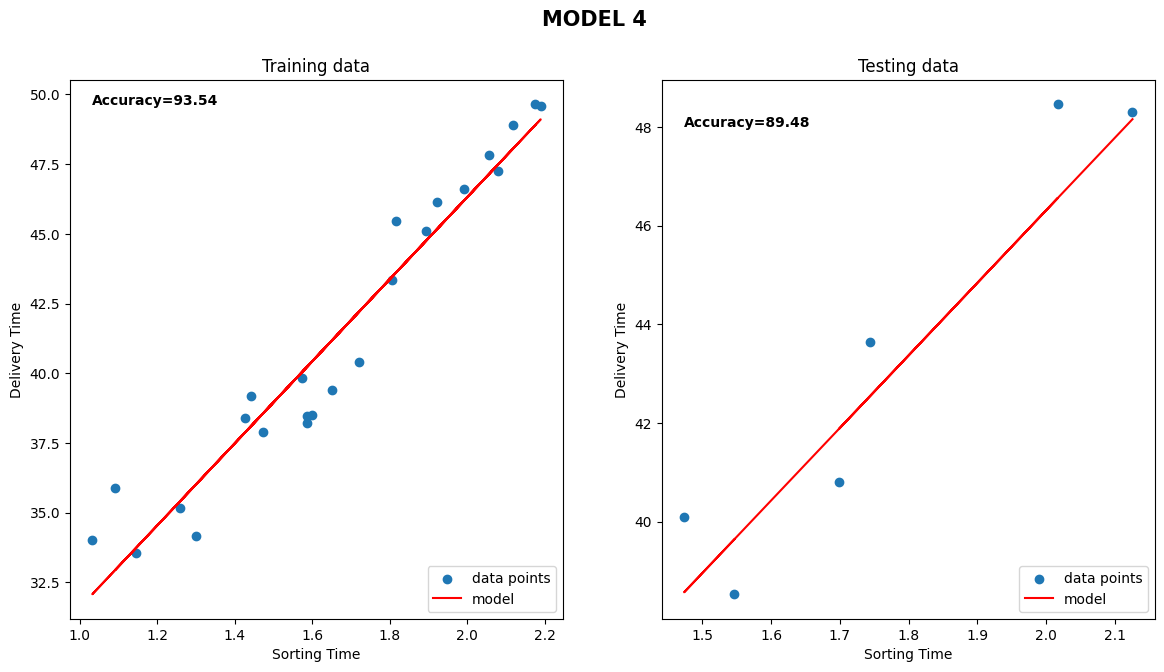

In [ ]:
#cbrt transformation
model_4=data_tansform(4)
build_model()
tr4,ts4,mse4=view_model("MODEL 4",2)

In [ ]:
comparison_df()

,Models,Transformarion,Train Score,Test Score,MSE
0,Model 1,no,96.45,90.24,2.710225e+07
1,Model 2,log,90.59,87.15,1.336156e-02
2,Model 3,square root,94.61,90.03,1.369460e+02
3,Model 4,cube root,93.54,89.48,1.747857e+00


# **Model 1 with no transformation has better accuracy and least mean squared error**



---

